In [83]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


In [84]:
# Copy the dataframe
df_no_duplicates = pd.read_csv('HR_capstone_dataset_no_duplicates.csv')
df_enc = df_no_duplicates.copy()
# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


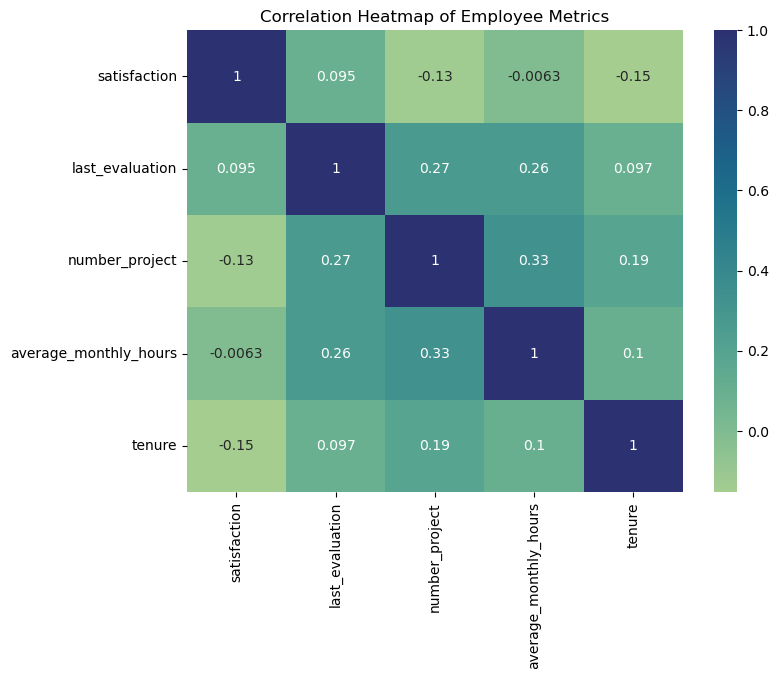

In [85]:
# Create a heatmap to visualize how correlated variables are

plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Correlation Heatmap of Employee Metrics')
plt.savefig('Figures/correlation_heatmap.png')  # Save the figure to the Figures folder
plt.show()

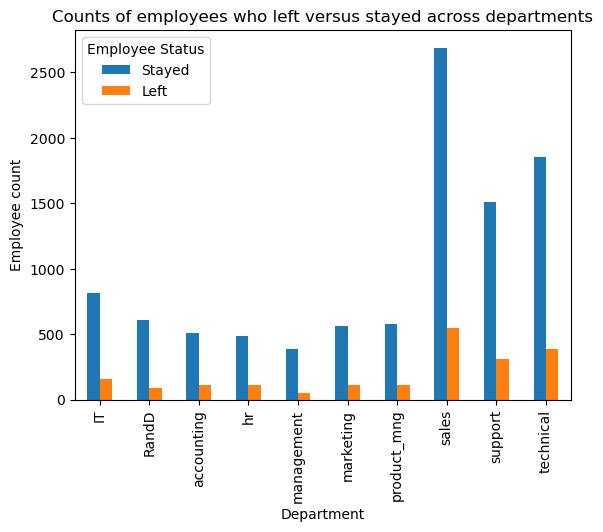

In [86]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't

# Create the crosstab plot
cross_tab = pd.crosstab(df_no_duplicates['department'], df_no_duplicates['left'])

# Plot the crosstab
cross_tab.plot(kind='bar')
plt.title('Counts of employees who left versus stayed across departments')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.legend(['Stayed', 'Left'], title='Employee Status')
plt.savefig('Figures/employee_status_across_departments.png')  # Save the figure to the Figures folder
plt.show()

In [87]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [88]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [89]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [91]:
# Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [92]:
# Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [93]:
# Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [94]:
# Evaluate models
def evaluate_model(model, X_test, y_test):
    # Generate predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return pd.DataFrame({'precision': [precision], 
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy],
                        'AUC': [auc]
                        })

In [95]:
%%time
# Assign a dictionary of hyperparameters to search over for each model
logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# GridSearchCV for Logistic Regression
logistic_grid = GridSearchCV(LogisticRegression(), logistic_params, cv=5, scoring=['roc_auc', 'accuracy'], refit='roc_auc')
logistic_grid.fit(X_train_scaled, y_train)


# Print best parameters and best scores
print("Logistic Regression - Best Parameters:", logistic_grid.best_params_)
print("Logistic Regression - Best AUC Score:", rf_grid.best_score_)

Logistic Regression - Best Parameters: {'C': 0.01}
Logistic Regression - Best AUC Score: 0.9820621800839884
CPU times: user 4.73 s, sys: 5.55 s, total: 10.3 s
Wall time: 943 ms


In [96]:
%%time
# Assign a dictionary of hyperparameters to search over for each model
rf_params = {'n_estimators': [100, 200, 300],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}

# GridSearchCV for Random Forest Classifier
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, n_jobs=8, scoring=['roc_auc', 'accuracy'], refit='roc_auc')
rf_grid.fit(X_train, y_train)

print("\nRandom Forest - Best Parameters:", rf_grid.best_params_)
print("Random Forest - Best AUC Score:", rf_grid.best_score_)


Random Forest - Best Parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Best AUC Score: 0.9819211975416309
CPU times: user 2.68 s, sys: 573 ms, total: 3.25 s
Wall time: 1min 37s


In [97]:
%%time
# Assign a dictionary of hyperparameters to search over for each model
gb_params = {'n_estimators': [100, 200, 300],
             'learning_rate': [0.01, 0.1, 0.5],
             'max_depth': [None, 3, 4, 5]}


# GridSearchCV for Gradient Boosting Classifier
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=5, n_jobs=8, scoring=['roc_auc', 'accuracy'], refit='roc_auc')
gb_grid.fit(X_train, y_train)


print("\nGradient Boosting - Best Parameters:", gb_grid.best_params_)
print("Gradient Boosting - Best AUC Score:", gb_grid.best_score_)


Gradient Boosting - Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Gradient Boosting - Best AUC Score: 0.9865178828876606
CPU times: user 1.54 s, sys: 131 ms, total: 1.67 s
Wall time: 1min 19s


now let's get the test scores for the best performing classifiers on the test dataset

In [98]:
print("Logistic Regression Model:")
print(evaluate_model(logistic_grid, X_test_scaled, y_test))

print("\nRandom Forest Classifier Model:")
print(evaluate_model(rf_grid, X_test, y_test))

print("\nGradient Boosting Classifier Model:")
print(evaluate_model(gb_grid, X_test, y_test))

Logistic Regression Model:
   precision   recall        f1  accuracy      AUC
0   0.477477  0.13217  0.207031  0.830763  0.55157

Random Forest Classifier Model:
   precision    recall        f1  accuracy       AUC
0   0.975275  0.885287  0.928105  0.977074  0.940391

Gradient Boosting Classifier Model:
   precision    recall        f1  accuracy       AUC
0   0.965517  0.907731  0.935733  0.979158  0.950612


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



The models' performance metrics provide valuable insights into their effectiveness:

- **Logistic Regression Model:**
  - Precision: 0.48
  - Recall: 0.13
  - F1-Score: 0.21
  - Accuracy: 0.83
  - AUC: 0.55
  
- **Random Forest Classifier Model:**
  - Precision: 0.98
  - Recall: 0.89
  - F1-Score: 0.93
  - Accuracy: 0.98
  - AUC: 0.94

- **Gradient Boosting Classifier Model:**
  - Precision: 0.97
  - Recall: 0.91
  - F1-Score: 0.94
  - Accuracy: 0.98
  - AUC: 0.95

**Key Insights:**

1. **Gradient Boosting Classifier** outperforms both Logistic Regression and Random Forest in terms of AUC score, precision, recall, F1-score, and accuracy. It achieves an AUC score of 0.95, indicating excellent performance in distinguishing between employees who stayed and those who left.

2. **Random Forest Classifier** demonstrates high precision, recall, and F1-score, indicating its effectiveness in identifying employees who left the company. However, its AUC score is slightly lower compared to Gradient Boosting.

3. **Logistic Regression** performs the poorest among the three models, with lower precision, recall, F1-score, and AUC. It struggles to accurately classify employees who left the company.

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Conclusion:**

The models and feature importances extracted indicate a concerning trend of overworked employees within the company. This is evident from the correlation between various work-related factors and the likelihood of employees leaving.

**Recommendations:**

1. **Cap Workload:** Consider implementing a cap on the number of projects employees can work on to prevent burnout and dissatisfaction.

2. **Address Employee Satisfaction:** Investigate and address the dissatisfaction among employees, especially those with four years of tenure. Promotions or specific interventions may be necessary.

3. **Fair Compensation:** Ensure fair compensation or rewards for employees who work longer hours, or revisit workload expectations to promote work-life balance.

4. **Transparent Policies:** Clearly communicate company policies regarding overtime pay, workload expectations, and time-off to all employees to avoid misunderstandings and dissatisfaction.

5. **Cultural Assessment:** Conduct company-wide and team-specific discussions to understand and address any underlying issues contributing to the overworked culture.

6. **Reconsider Evaluation Criteria:** Review the evaluation criteria to ensure that high evaluation scores are not solely tied to employees who work excessively long hours. Consider a more equitable evaluation system.

**Next Steps:**

1. **Data Leakage Concerns:** Address concerns about potential data leakage by assessing model performance without certain features, such as last_evaluation, to understand their impact on predictions.

2. **Exploratory Analysis:** Explore alternative approaches, such as predicting performance scores or conducting clustering analysis using K-means, to gain further insights into employee dynamics and retention factors.

By implementing these recommendations and exploring additional analyses, the company can take proactive steps to improve employee retention, foster a healthier work environment, and ultimately enhance organizational success.